In [1]:
from utils import *

dfls = read_df_list('combat_df_list_imms_1_full_perspective_list_moreRefuse_refuseCleaned.pkl')

dfls = flatten_df_list(dfls)
concated_df = pd.concat(dfls, ignore_index=True)
refused_concated_df = concated_df[concated_df['true_rate'] < 0.67]

print(len(dfls), len(concated_df), len(refused_concated_df))
check_column_type(concated_df)

7139 35116 3130
text <class 'str'>
imm_1 <class 'str'>
imm_1_check <class 'numpy.bool_'>
perspective <class 'dict'>
perspective_type <class 'type'>
perspective_ls <class 'list'>
refuse_add <class 'list'>
true_rate <class 'numpy.float64'>


In [2]:
perspective_keys = ['len',
    'AFFINITY_EXPERIMENTAL', 'COMPASSION_EXPERIMENTAL', 'CURIOSITY_EXPERIMENTAL',
    'IDENTITY_ATTACK', 'IDENTITY_ATTACK_EXPERIMENTAL', 'INSULT',
    'INSULT_EXPERIMENTAL', 'NUANCE_EXPERIMENTAL', 'PERSONAL_STORY_EXPERIMENTAL',
    'PROFANITY', 'PROFANITY_EXPERIMENTAL', 'REASONING_EXPERIMENTAL',
    'RESPECT_EXPERIMENTAL', 'SEVERE_TOXICITY', 'SEVERE_TOXICITY_EXPERIMENTAL',
    'SEXUALLY_EXPLICIT', 'THREAT', 'THREAT_EXPERIMENTAL',
    'TOXICITY', 'TOXICITY_EXPERIMENTAL'
]
perspective_dict = {key: i for i, key in enumerate(perspective_keys)}
reverse_perspective_dict = {i: key for i, key in enumerate(perspective_keys)}

In [3]:
n=perspective_dict['NUANCE_EXPERIMENTAL']
concated_df['sort_key'] = concated_df['perspective_ls'].apply(lambda x: x[n] if x is not None else -0.1)
df_sorted = concated_df.sort_values(by='sort_key', ascending=False)
top_20_percent_df = df_sorted.head(int(len(df_sorted)/5))
print(top_20_percent_df['text'].values)
print(top_20_percent_df['sort_key'].values)
print(len(top_20_percent_df))

["That's fine if it's your opinion. \n\nAt my university the professor is meant to spend the first day detailing the syllabus to the class and laying out expectations clear and fair to all attendees.\n\nIf the class is philosophy, which OP said it was, then the issue isn't with questioning Islam in general, that is par for the course (no pun intended). The issue appears to be the manner in which OP questioned and defended their points. It's fine to say Islam isn't a religion of peace--as OP shows by there being no issue with making this claim at first. The issue comes from the manner in which they defended their point. Now, I'm not automatically siding with the professor in this instance. I'm laying out the probable case that the instructor found OP's response wanting in some manner or respect--wanting in the sense of it lacking some awareness or sensitivity that the course demands in the syllabus. \n\nIt is completely possible that the professor's ideology seeped into the response to 

In [4]:
import matplotlib.pyplot as plt

def histogram_with_box_plot(df, col_name, name='Data'):
    fig, ax1 = plt.subplots(figsize=(10, 12))
    
    # Create a histogram with specified bin width (0.001)
    bins = int((df[col_name].max() - df[col_name].min()) / 0.005)
    ax1.hist(df[col_name], bins=bins, color='red', alpha=0.6, label='Histogram')

    # Create a second y-axis for the box plot
    ax2 = ax1.twinx()

    # Create a box plot
    ax2.boxplot(df[col_name], vert=False, positions=[df[col_name].max()/2], widths=0.3, patch_artist=True)

    # Set labels and titles
    ax1.set_xlabel('Value')
    ax1.set_ylabel('Frequency')
    ax2.set_ylabel('Box Plot Values')
    plt.title(f'Histogram with Overlaid Box Plot for {name}')

    # Show the plot
    plt.show()

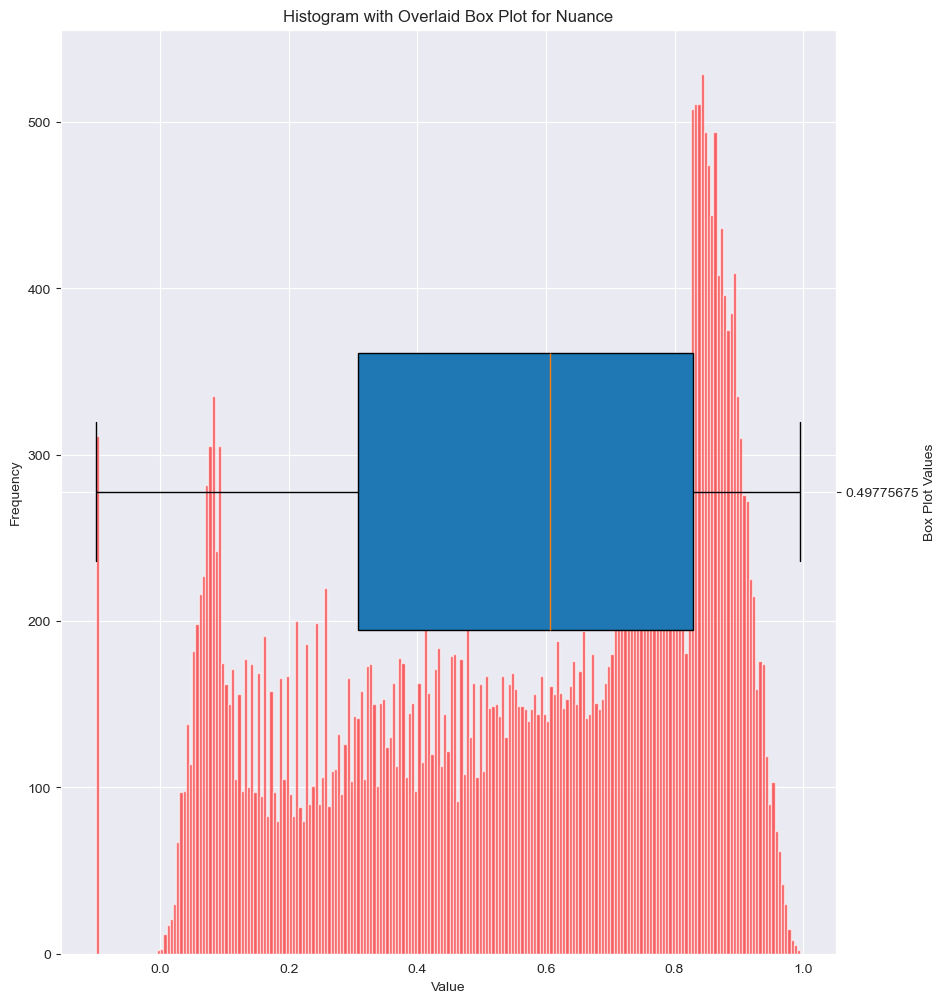

In [5]:
histogram_with_box_plot(df_sorted, 'sort_key', name='Nuance')
del df_sorted, top_20_percent_df

In [6]:
def plot_perspective_histogram(df, perspective_key):
    n=perspective_dict[perspective_key]
    df['sort_key'] = df['perspective_ls'].apply(lambda x: x[n] if x is not None else -0.1)
    df_sorted = df.sort_values(by='sort_key', ascending=False)
    histogram_with_box_plot(df_sorted, 'sort_key', name=perspective_key)
    del df_sorted
    
def iterate_perspective_histogram(df, perspective_keys):
    for key in perspective_keys:
        plot_perspective_histogram(df, key)

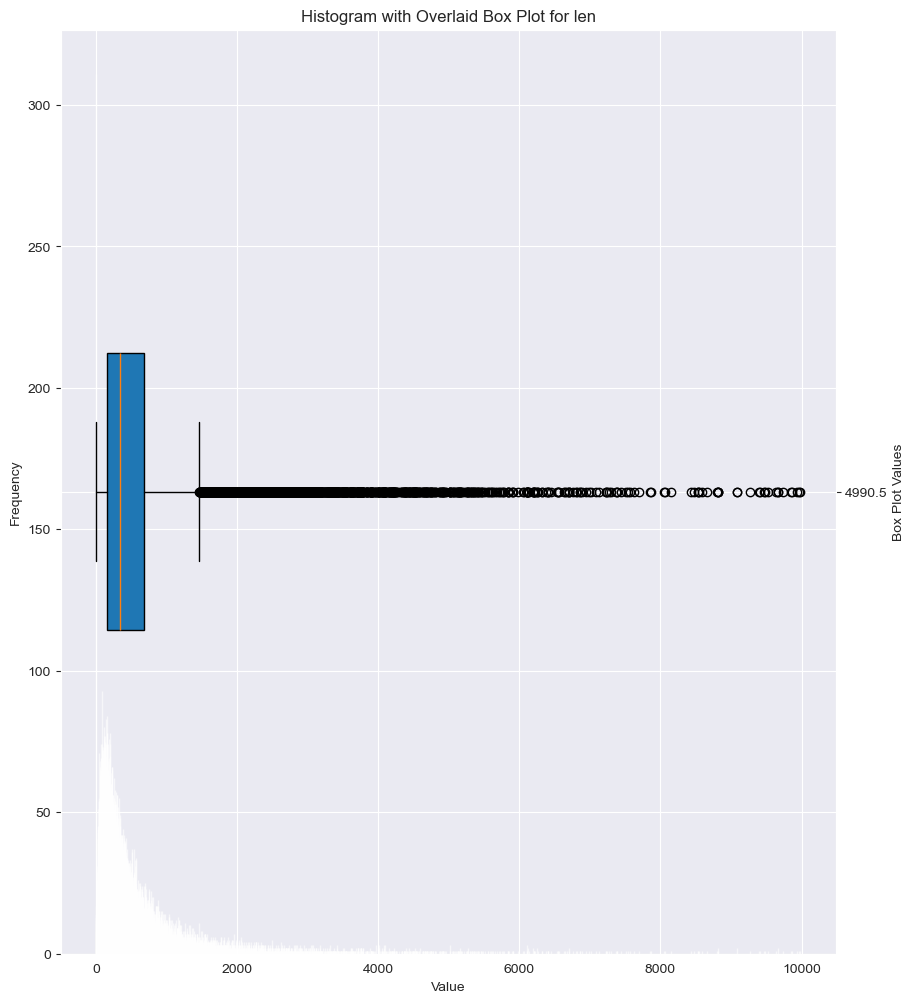

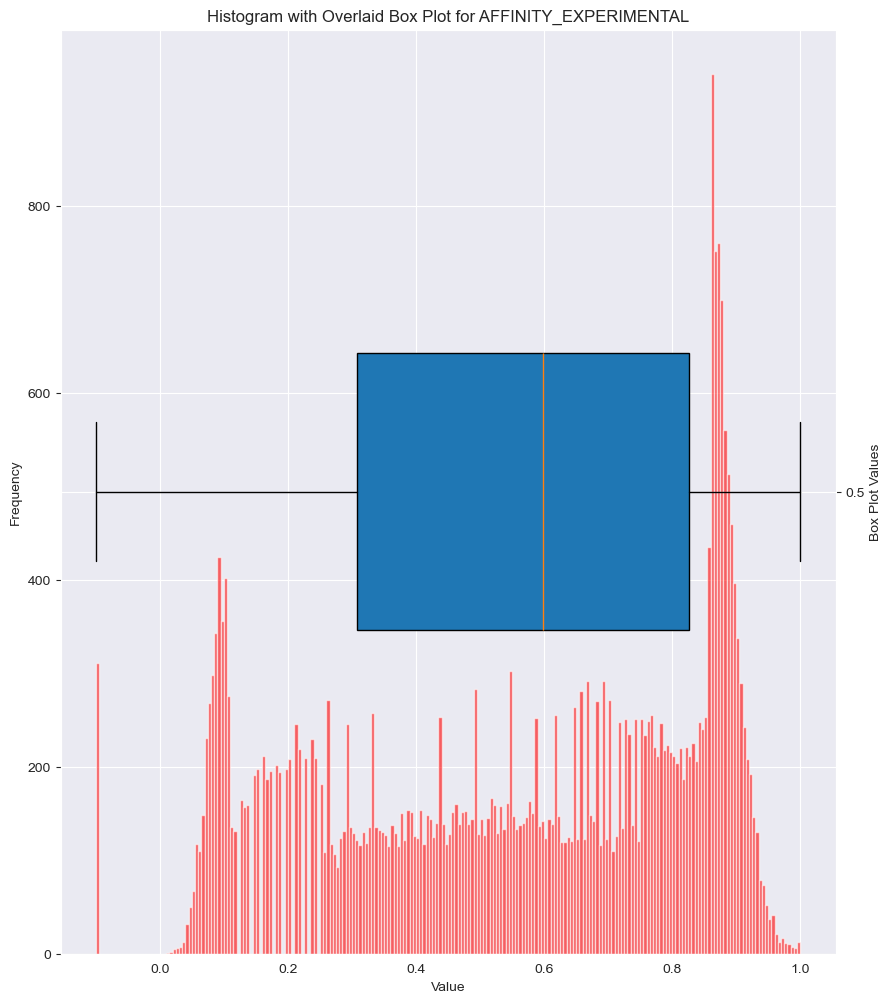

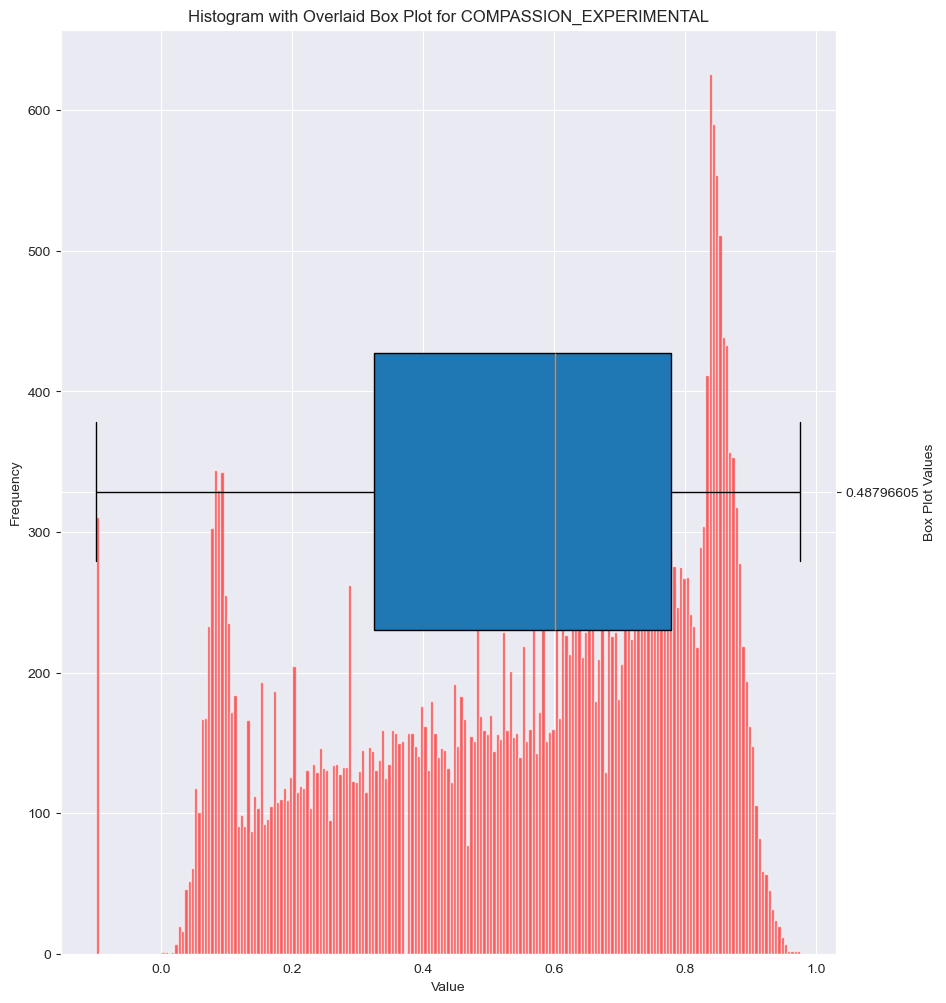

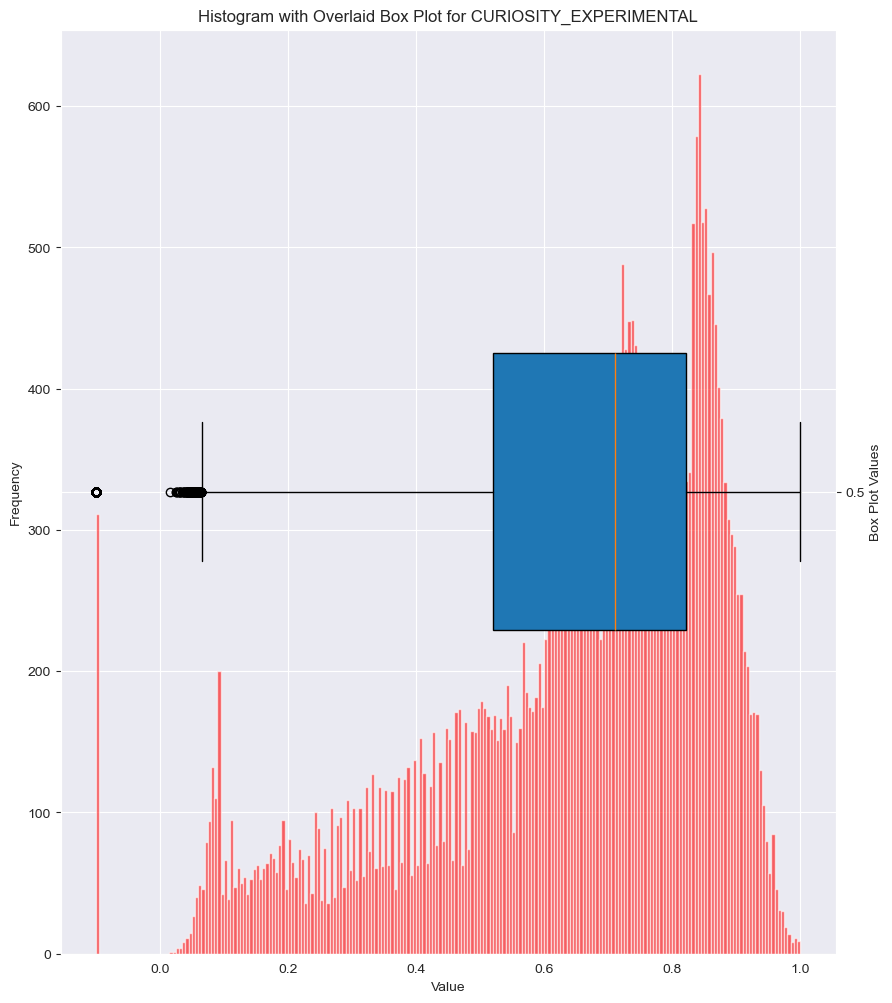

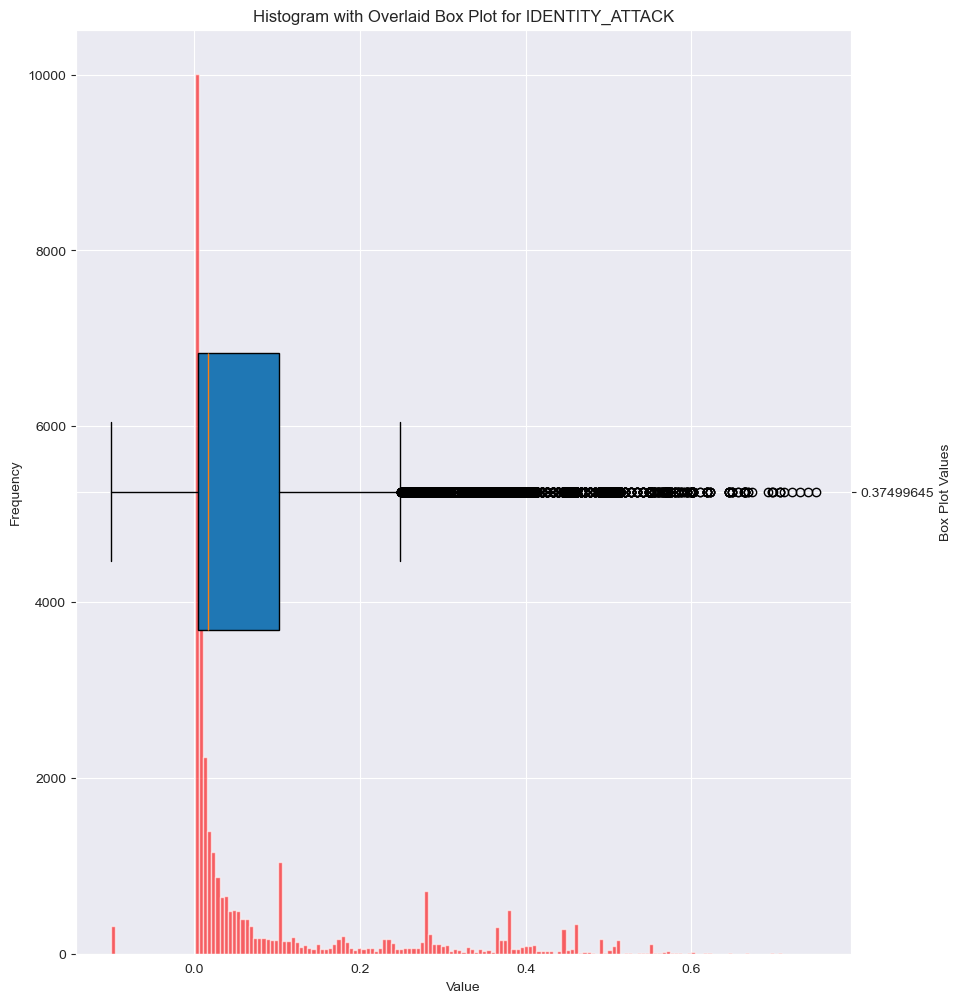

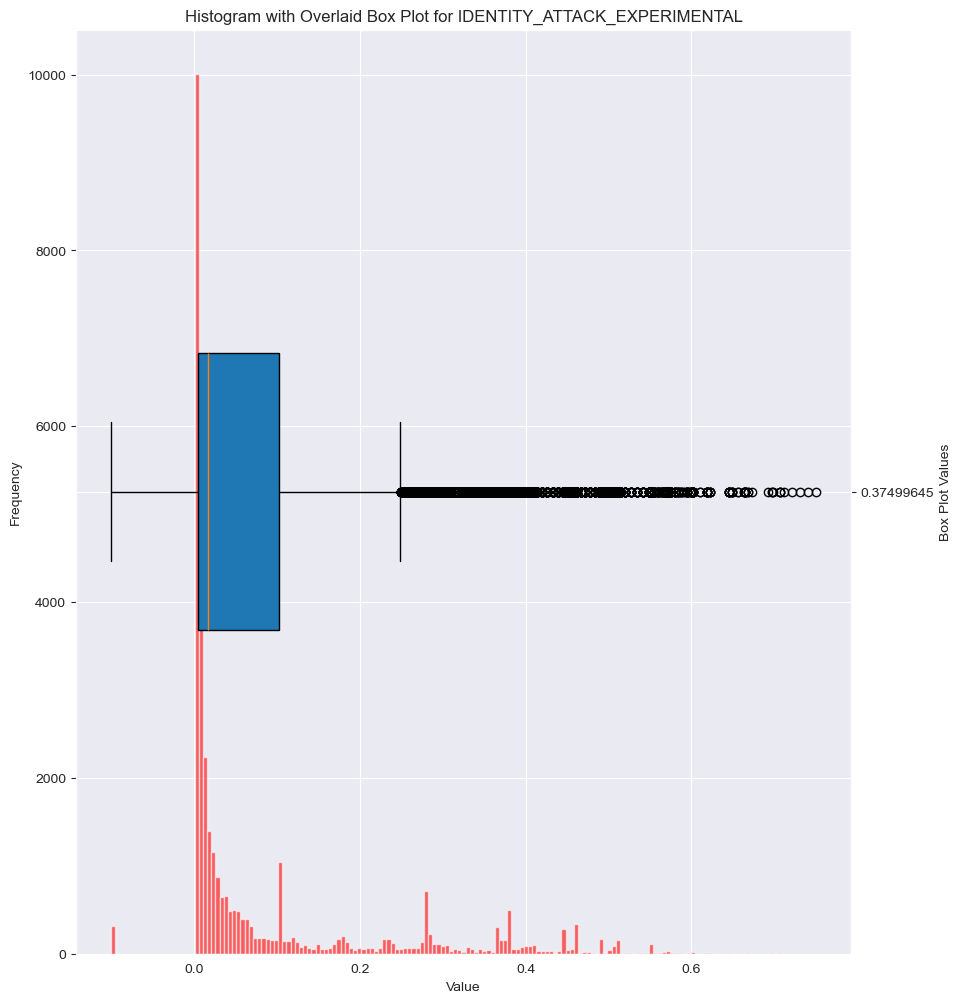

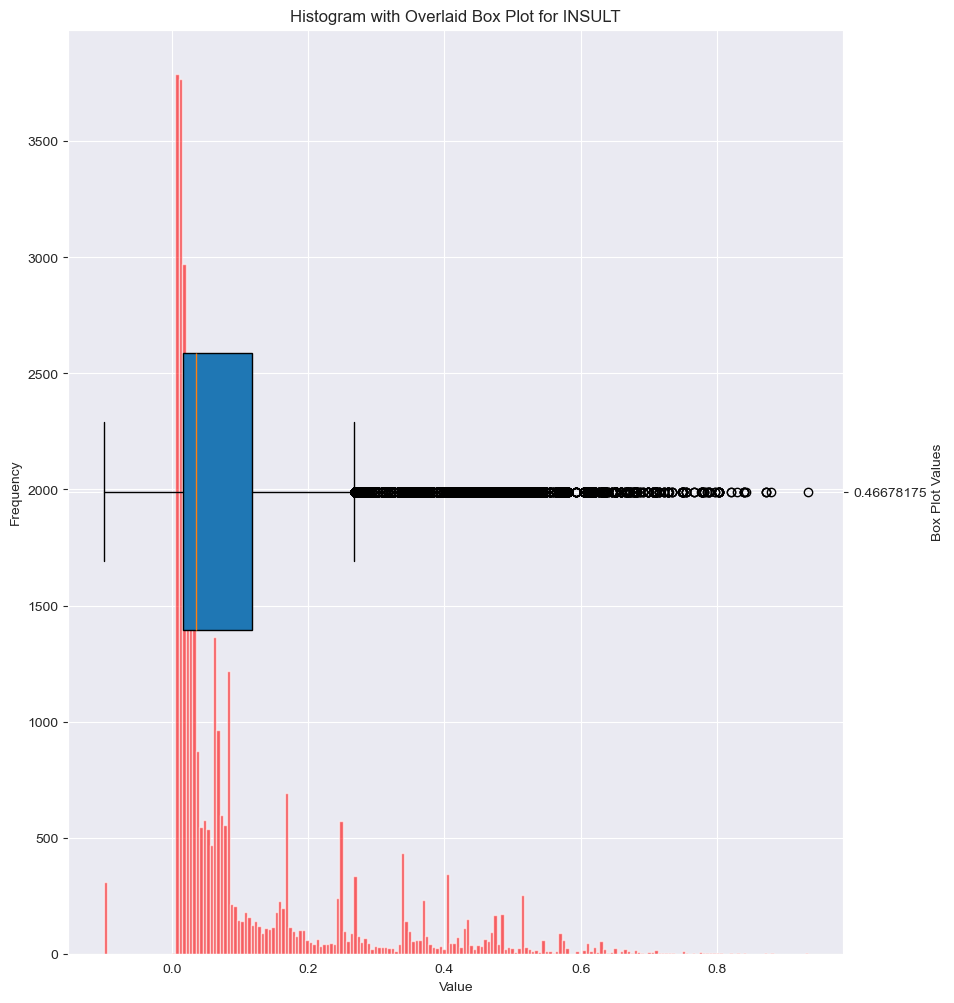

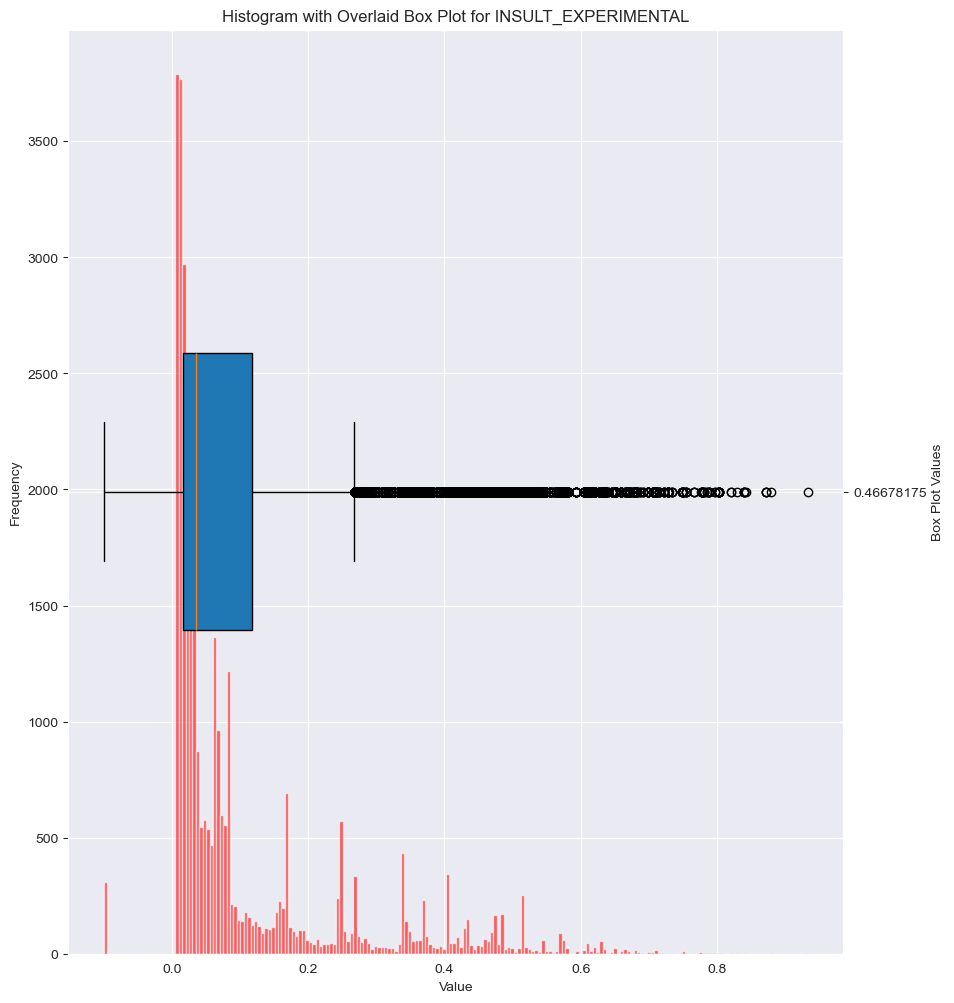

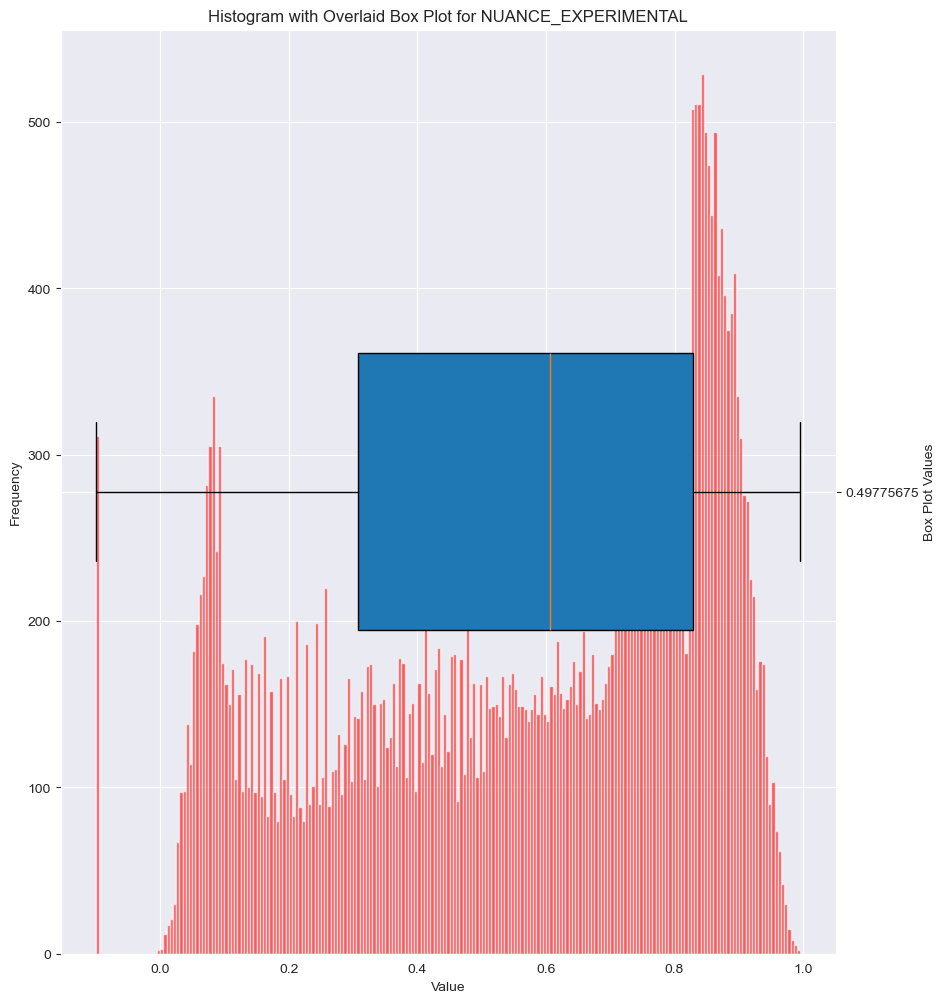

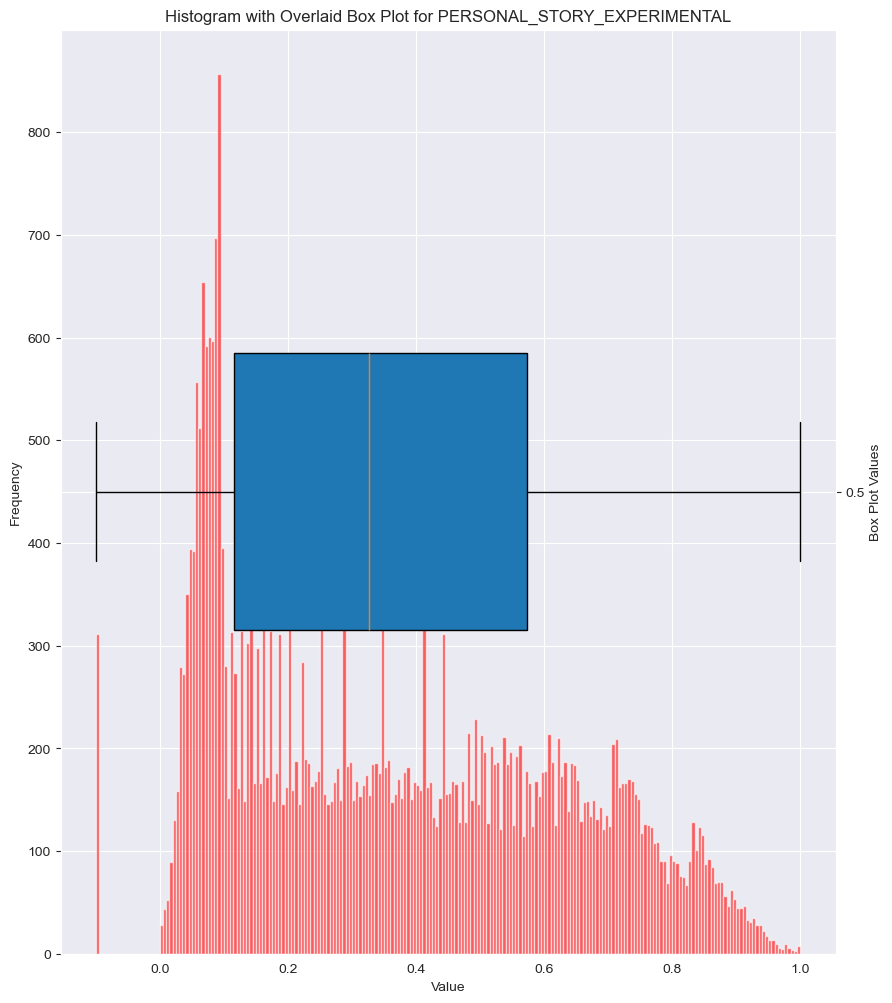

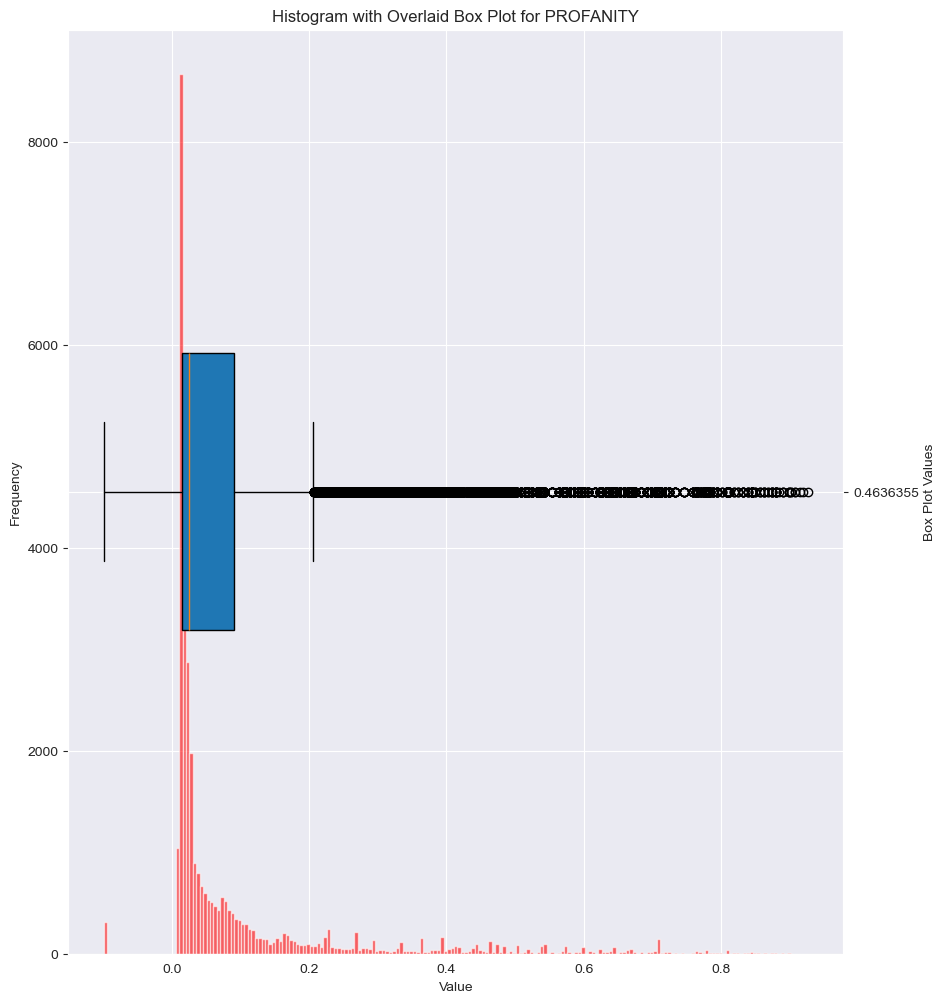

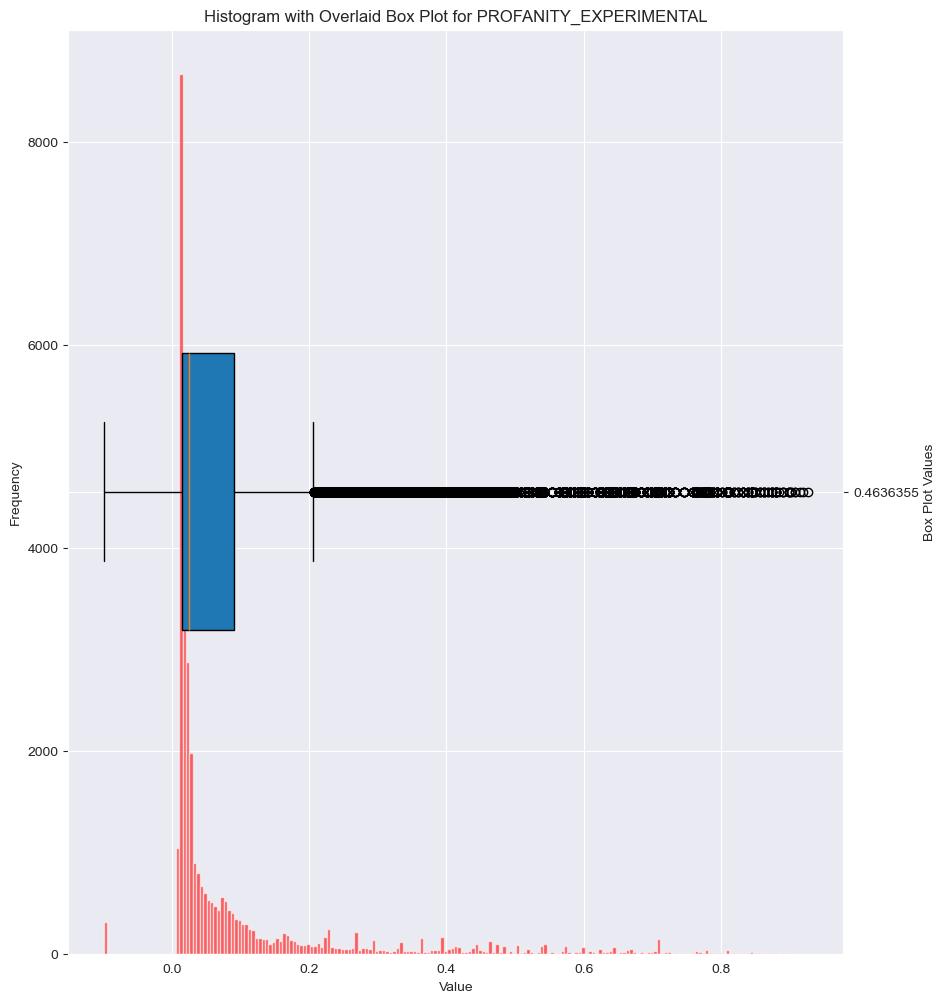

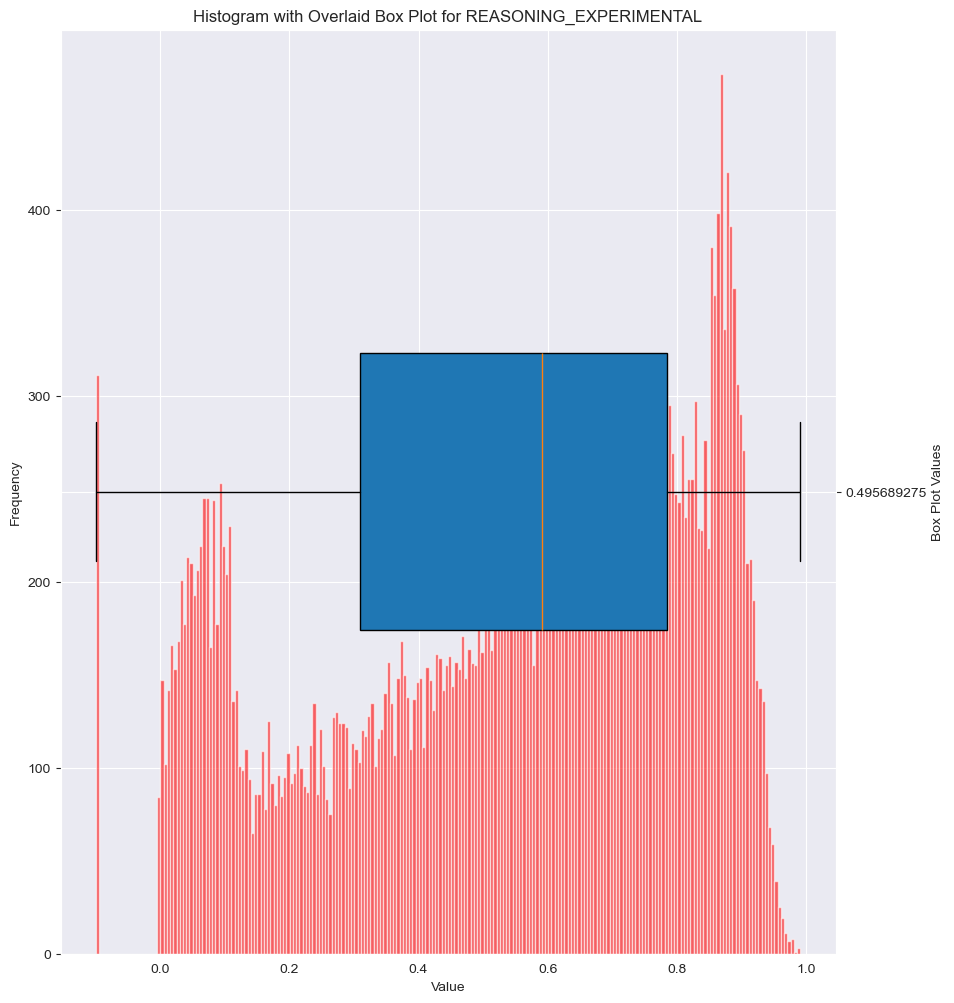

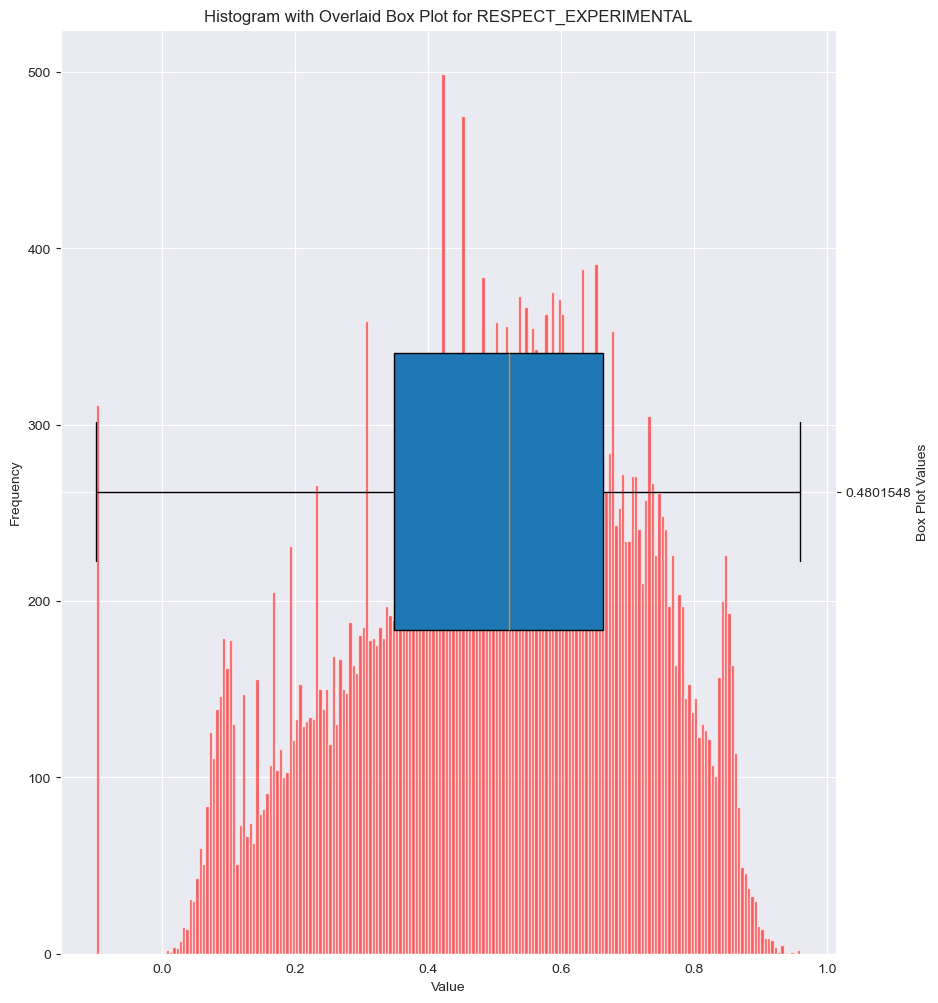

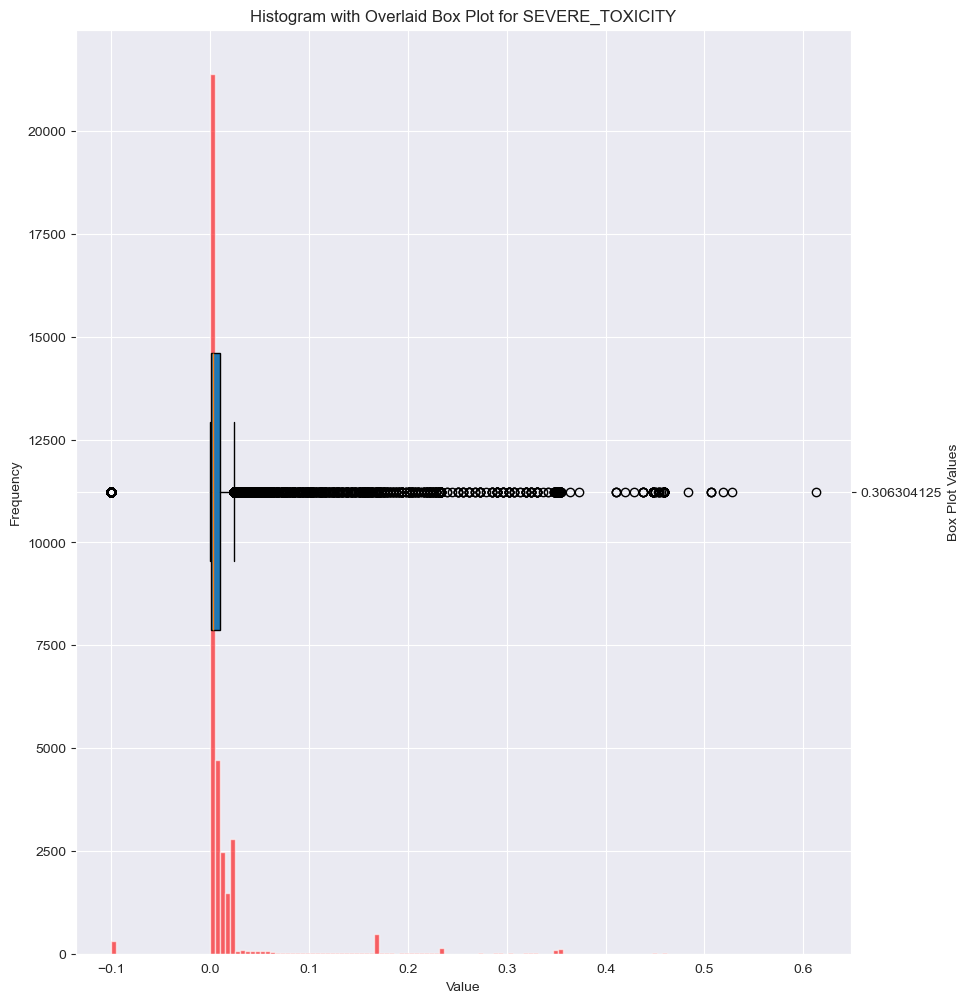

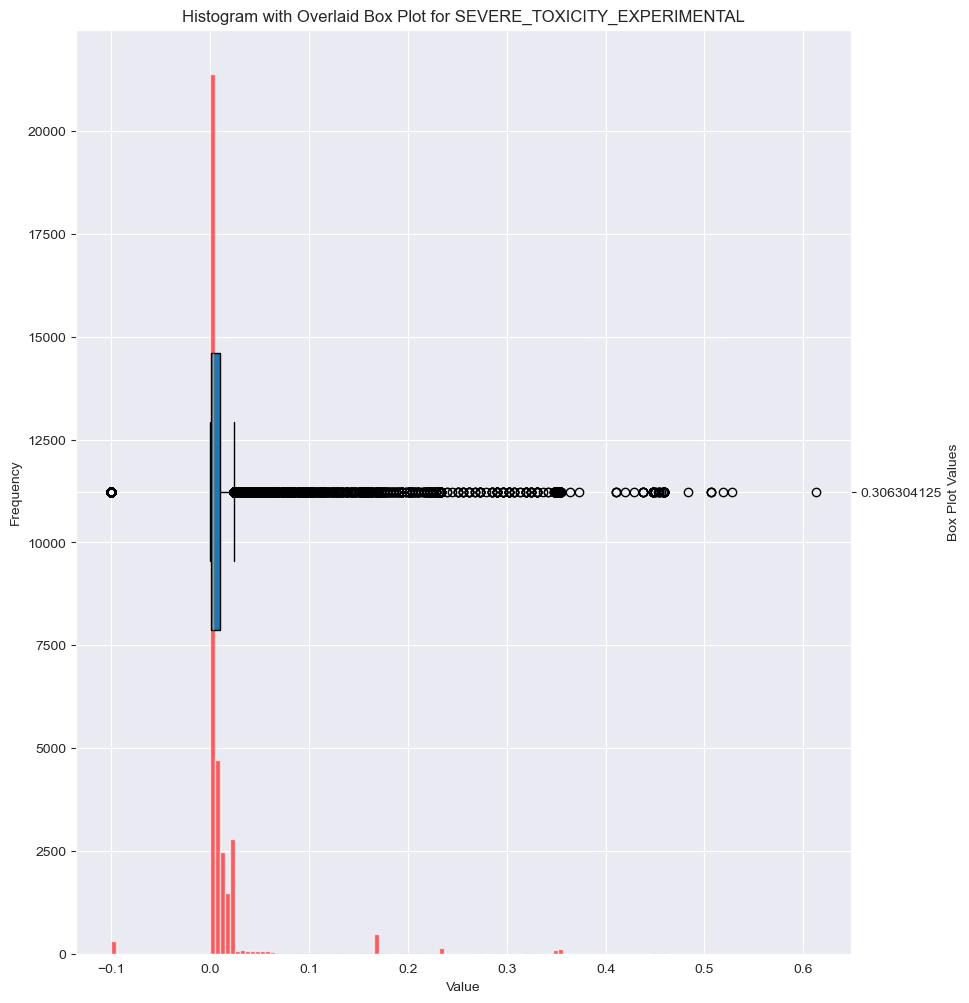

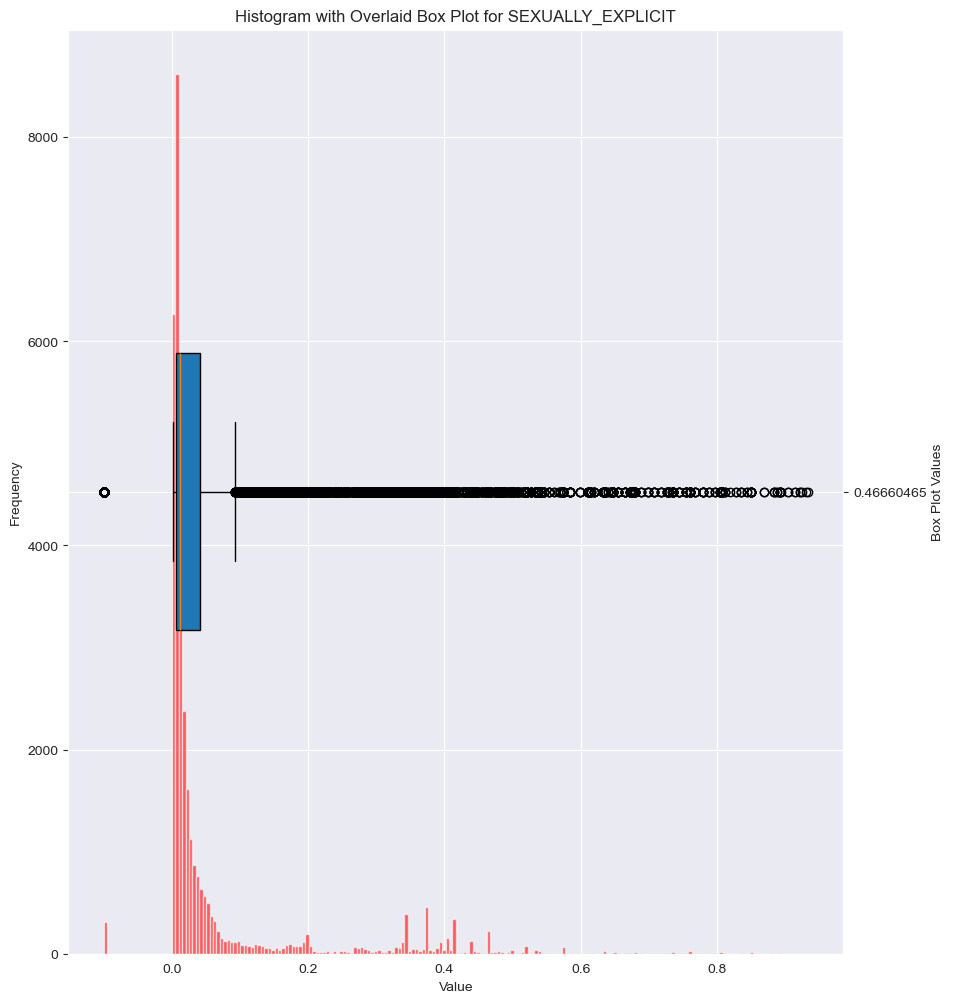

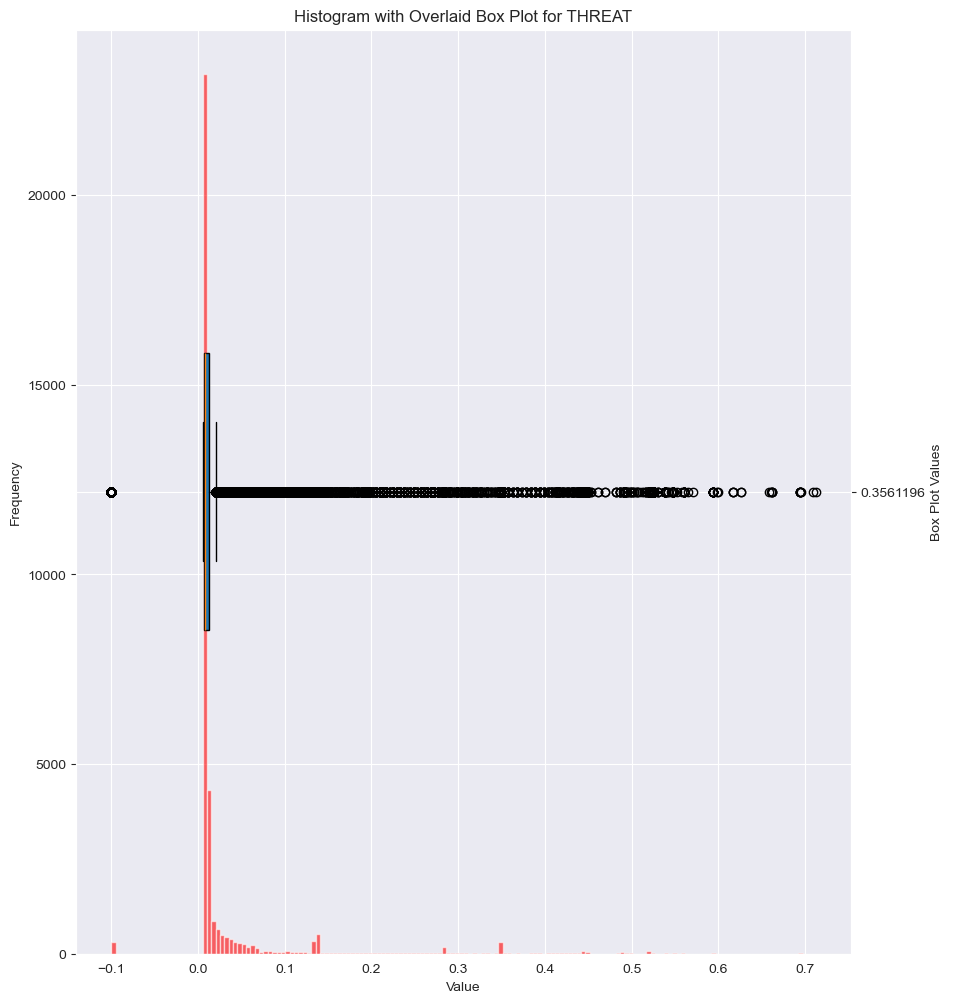

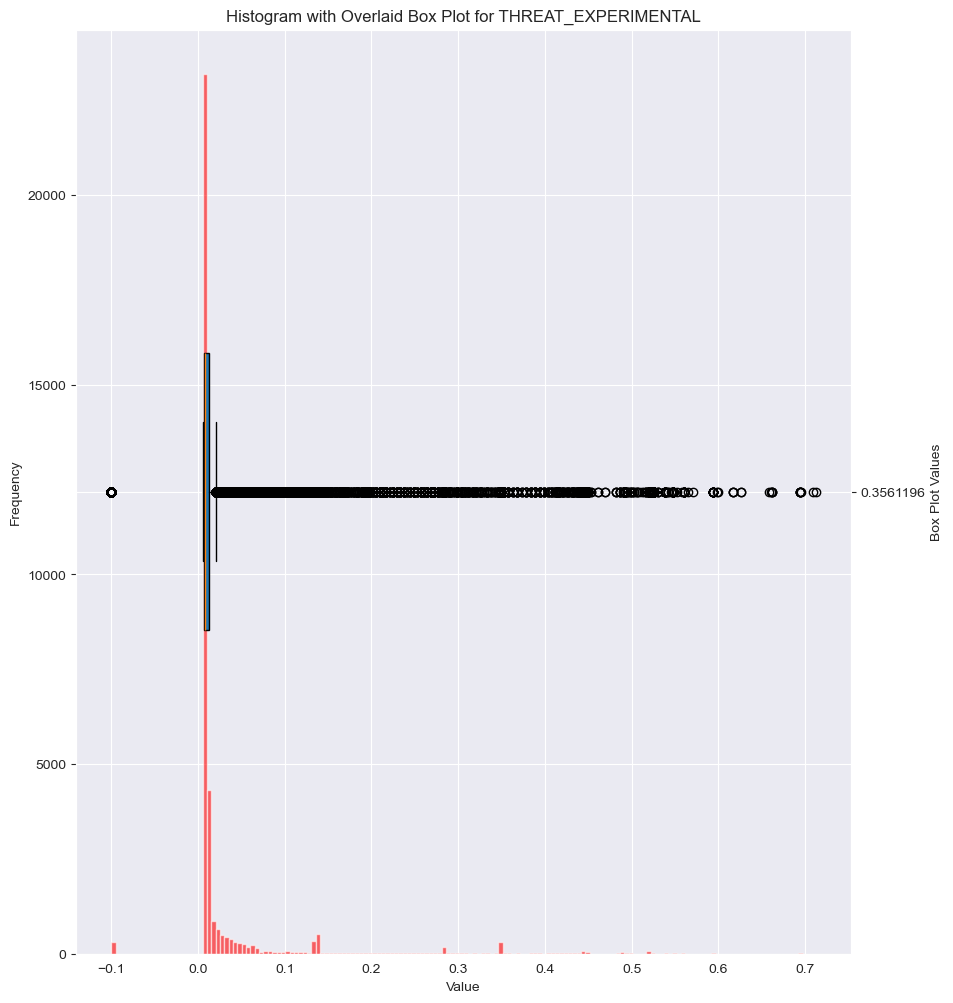

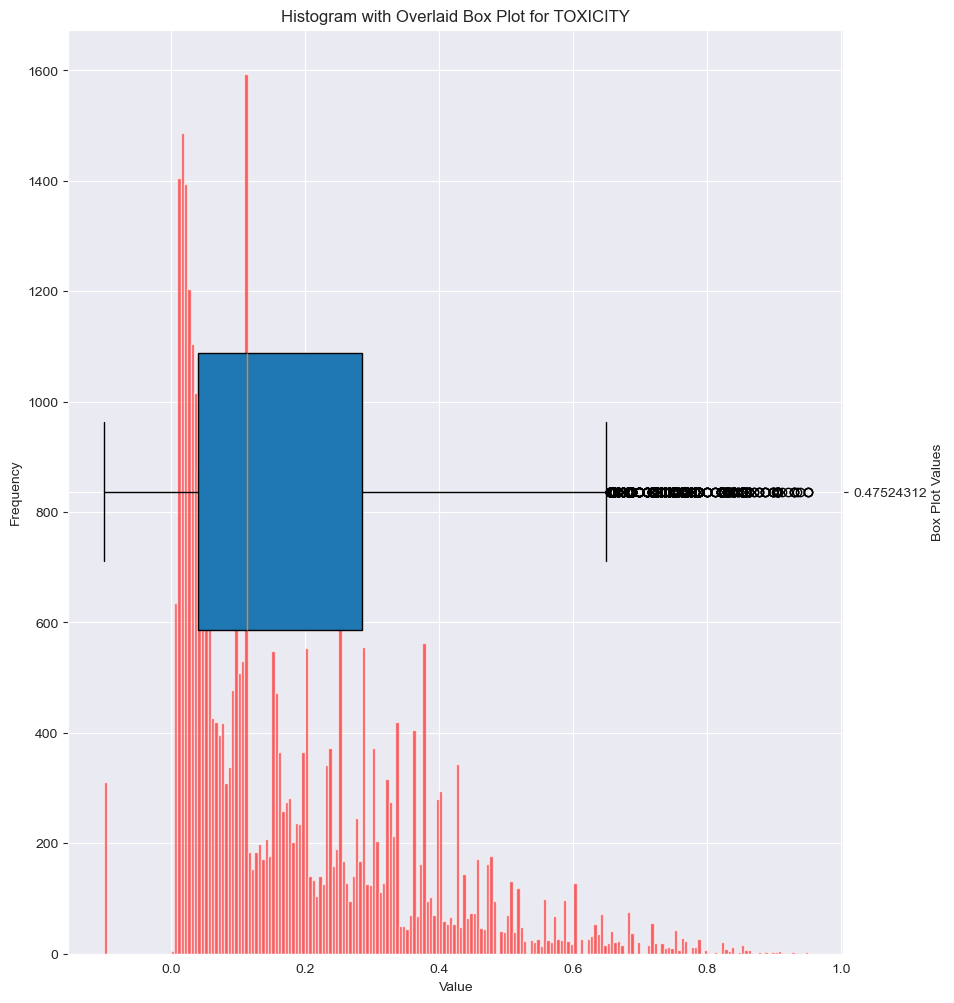

In [9]:
iterate_perspective_histogram(concated_df, perspective_keys[:5])
iterate_perspective_histogram(concated_df, perspective_keys[5:10])
iterate_perspective_histogram(concated_df, perspective_keys[10:15])
iterate_perspective_histogram(concated_df, perspective_keys[15:20])


In [ ]:
useless_perspective=['IDENTITY_ATTACK', 'INSULT', 'PROFANITY', 'SEVERE_TOXICITY', 'THREAT']

In [23]:
concated_df['sort_key'] = concated_df['perspective_ls'].apply(lambda x: x[perspective_dict['RESPECT_EXPERIMENTAL']] if x is not None else -0.1)
res_df_sorted = concated_df.sort_values(by='sort_key', ascending=False).copy()
res_df_sorted = res_df_sorted[res_df_sorted['sort_key'] > 0.7]
refused_res_df_sorted = res_df_sorted[res_df_sorted['true_rate'] < 0.67]
# reason_df = concated_df[concated_df['perspective_ls'][perspective_dict['REASONING_EXPERIMENTAL']] > 0.7]

# sorted_respect_df = res_df_sorted.sort_values(by='RESPECT_EXPERIMENTAL', ascending=False)
# sorted_reason_df = reason_df.sort_values(by='REASONING_EXPERIMENTAL', ascending=False)

In [24]:
print(len(res_df_sorted))
print(refused_res_df_sorted.count())

6711
text                248
imm_1               248
imm_1_check         248
perspective         248
perspective_type    248
perspective_ls      248
refuse_add          248
true_rate           248
sort_key            248
dtype: int64


In [25]:
print(refused_res_df_sorted.sample(10)['text'].values)

['I actually agree with you a little. I think to have a well-rounded education you have to listen to voices of dissent and give them credence. I actually got in this fight on Friday night. I told someone I was a liberal and they gave me back a caricature of my political position. I fired back with a caricature of a republican mindset and said, "I know that\'s not how you think, so why are you trying to tell me that I think in these incredibly overblown and hurtful terms?". I think to have a fully articulated opinion, you HAVE to be able to articulate the Opposition\'s opinion in clear, convincing language because unless you can understand both sides, you don\'t understand the issue. Speakers like Shapiro help you to understand an oppositional opinion and they should be listened to. \n\n**But I\'m still against the campus speaking tour**. NOT Because he\'s right-wing. I don\'t care about that. I care that he isn\'t an academic. \n\nThe University has two budgets. One is meant to bring a

In [33]:
from utils import *
for _ in range(10):
    a = refused_res_df_sorted.sample(1)['text'].values[0]
    print(a+"#############################\n")
    print(sentence_immitation_stream(a, temperature=0)+"\n!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
# chat_immitation_stream(res_df_sorted.sample(10)['text'].values[0])

You are probably right that people in danger of snapping and going on a shooting rampage will not automatically become happy and sane. But if it cures the symptoms of them shooting innocent people I still think it's a good first step.#############################

{"--IMMITATION--": "I agree with you to an extent, but let's be realistic - simply making someone happy won't magically erase their underlying issues. However, if this approach can help alleviate the immediate symptoms and prevent further harm, I believe it's a necessary starting point."}
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
Because kids are very impressionable and no matter where you stand, being gay or trans is in no way preferable to being straight. Say what you want, but kids in stable heterosexual families are the most successful family type. Therefore, as a society, we should encourage that which is beneficial. That is why children's books have hetero families in them. If we start exposing younger and younger kids to LGBT 

In [96]:
str = refused_res_df_sorted.sample(1)['text'].values[0]
print(str)
b= split_text_llamaCpp(str)
print(b)
print(sentence_immitation_stream(str, temperature=0))

You make good points as to why doing the gesture today would be offensive to many many people. I understand this and as I've mentioned elsewhere, apathy to their feelings is morally wrong which is why I would not modify my skin color in today's social climate. but I still stand by my argument and feel as if the offense to the proposed gesture is still unwarranted. I agree that racism is still very much alive today and minorities are still facing the consequences of discrimination from the country"s ancestors.

 However, by continuing to hold the viewpoint that a gesture like the one I propose is inherently racist only works to perpetuate racism. Based on the premise behind your argument it would not be racist for a black person or basically anyone of any race to do white face because white people in the USA have never been systematically discriminated against. This IMO is a racist viewpoint if anything. If the intent of the gesture is not the same as the times of old where blackface wa

In [103]:
str = """
You make good points as to why doing the gesture today would be offensive to many many people. I understand this and as I've mentioned elsewhere, apathy to their feelings is morally wrong which is why I would not modify my skin color in today's social climate. but I still stand by my argument and feel as if the offense to the proposed gesture is still unwarranted. I agree that racism is still very much alive today and minorities are still facing the consequences of discrimination from the country"s ancestors.
"""
print(split_text_llamaCpp(str))
print(sentence_immitation_stream(str, temperature=0))

['\n', 'You', ' make', ' good', ' points', ' as', ' to', ' why', ' doing', ' the', ' gesture', ' today', ' would', ' be', ' offensive', ' to', ' many', ' many', ' people', '.', ' I', ' understand', ' this', ' and', ' as', ' I', "'ve", ' mentioned', ' elsewhere', ',', ' ap', 'athy', ' to', ' their', ' feelings', ' is', ' morally', ' wrong', ' which', ' is', ' why', ' I', ' would', ' not', ' modify', ' my', ' skin', ' color', ' in', ' today', "'s", ' social', ' climate', '.', ' but', ' I', ' still', ' stand', ' by', ' my', ' argument', ' and', ' feel', ' as', ' if', ' the', ' offense', ' to', ' the', ' proposed', ' gesture', ' is', ' still', ' unw', 'arrant', 'ed', '.', ' I', ' agree', ' that', ' racism', ' is', ' still', ' very', ' much', ' alive', ' today', ' and', ' minorities', ' are', ' still', ' facing', ' the', ' consequences', ' of', ' discrimination', ' from', ' the', ' country', '"s', ' ancestors', '.\n\n']
I cannot generate text that promotes or justifies offensive gestures ba

In [105]:
str = """
 You make good points as to why doing the gesture today would be offensive to many many people. I understand this and as I've mentioned elsewhere, apathy to their feelings is morally wrong 
which is why I would not modify my sk--in-- color in today's social climate.but I still stand by my argument and feel as if the offense to the proposed gesture is still unwarranted. I agree that racism is still very much alive today and minorities are still facing the consequences of discrimination from the country"s ancestors.
"""
print(split_text_llamaCpp(str))
print(sentence_immitation_stream(str, temperature=0))

['\n', ' You', ' make', ' good', ' points', ' as', ' to', ' why', ' doing', ' the', ' gesture', ' today', ' would', ' be', ' offensive', ' to', ' many', ' many', ' people', '.', ' I', ' understand', ' this', ' and', ' as', ' I', "'ve", ' mentioned', ' elsewhere', ',', ' ap', 'athy', ' to', ' their', ' feelings', ' is', ' morally', ' wrong', ' \n', 'which', ' is', ' why', ' I', ' would', ' not', ' modify', ' my', ' sk', '--', 'in', '--', ' color', ' in', ' today', "'s", ' social', ' climate', '.but', ' I', ' still', ' stand', ' by', ' my', ' argument', ' and', ' feel', ' as', ' if', ' the', ' offense', ' to', ' the', ' proposed', ' gesture', ' is', ' still', ' unw', 'arrant', 'ed', '.', ' I', ' agree', ' that', ' racism', ' is', ' still', ' very', ' much', ' alive', ' today', ' and', ' minorities', ' are', ' still', ' facing', ' the', ' consequences', ' of', ' discrimination', ' from', ' the', ' country', '"s', ' ancestors', '.\n']
{"--IMMITATION--": "You raise valid concerns about why 